# Taller 1 - Calentamiento

### Importante: importar librerías antes de ejecutar el código

## 1. Reconocimiento

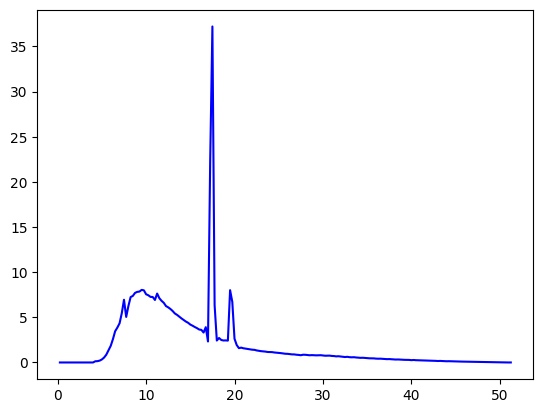

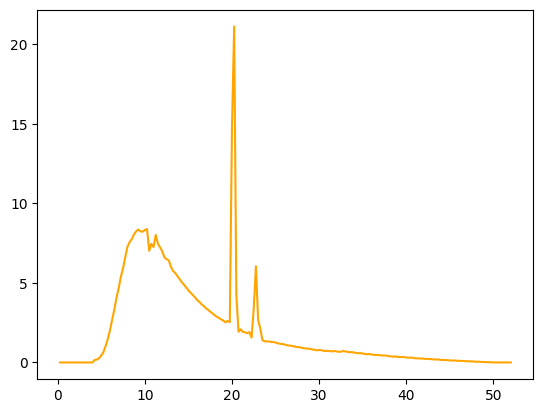

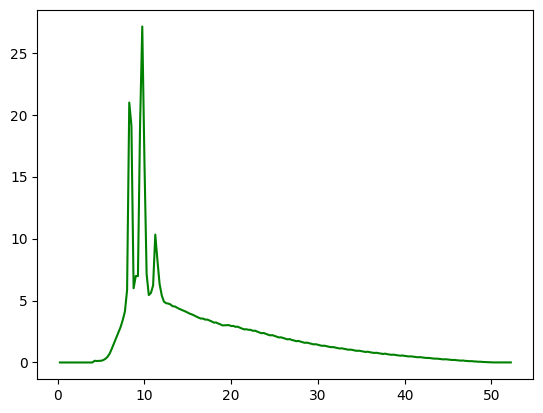

<class 'pandas.core.frame.DataFrame'>


'for i in range(10, 51):\n    print(f"Mo {i}kV: {Mo_unfiltered[i][\'energy\'][:5]} {Mo_unfiltered[i][\'intensity\'][:5]}")\n    print(f"Rh {i}kV: {Rh_unfiltered[i][\'energy\'][:5]} {Rh_unfiltered[i][\'intensity\'][:5]}")\n    print(f"W {i}kV: {W_unfiltered[i][\'energy\'][:5]} {W_unfiltered[i][\'intensity\'][:5]}")\n    print("-" * 40)\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Mo_unfiltered = {}
Rh_unfiltered = {}
W_unfiltered = {}
list_of_dfs = []

for i in range(10, 51):
    Mo_unfiltered[i] = {"energy": [], "intensity": []}
    Rh_unfiltered[i] = {"energy": [], "intensity": []}
    W_unfiltered[i] = {"energy": [], "intensity": []}

    directory_Mo = "mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_{}kV.dat".format(i)
    directory_Rh = "mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_{}kV.dat".format(i)
    directory_W = "mammography_spectra/W_unfiltered_10kV-50kV/W_{}kV.dat".format(i)
    with open(directory_Mo, "r") as file:
        content_Mo = file.read()
        lines_Mo = content_Mo.splitlines()
    with open(directory_Rh, "r") as file:
        content_Rh = file.read()
        lines_Rh = content_Rh.splitlines()
    with open(directory_W, "r") as file:
        content_W = file.read()
        lines_W = content_W.splitlines()

    for data_Mo in lines_Mo:
        if data_Mo.startswith("#"):
            continue
        values = data_Mo.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        Mo_unfiltered[i]["energy"].append(energy)
        Mo_unfiltered[i]["intensity"].append(intensity)


        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break
        """if energy > 50 or intensity > 1000:
            print("Warning: Values exceed expected ranges.")
            break"""

    for data_Rh in lines_Rh:
        if data_Rh.startswith("#"):
            continue
        values = data_Rh.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        Rh_unfiltered[i]["energy"].append(energy)
        Rh_unfiltered[i]["intensity"].append(intensity)

        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break
        """if energy > 50 or intensity > 1000:
            print("Warning: Values exceed expected ranges.")
            break"""

    for data_W in lines_W:
        if data_W.startswith("#"):
            continue
        values = data_W.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        W_unfiltered[i]["energy"].append(energy)
        W_unfiltered[i]["intensity"].append(intensity)

        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break
        """if energy > 50 or intensity > 1000:
            print("Warning: Values exceed expected ranges.")
            break"""
        
    """df_Mo = pd.DataFrame({
        'energy': Mo_unfiltered[i]['energy'],
        'intensity': Mo_unfiltered[i]['intensity']
    })
    df_Rh = pd.DataFrame({
        'energy': Rh_unfiltered[i]['energy'],
        'intensity': Rh_unfiltered[i]['intensity']
    })
    df_W = pd.DataFrame({
        'energy': W_unfiltered[i]['energy'],
        'intensity': W_unfiltered[i]['intensity']
    })

    df_Mo['kV'] = i
    df_Rh['kV'] = i
    df_W['kV'] = i

    list_of_dfs.append(df_Mo)
    list_of_dfs.append(df_Rh)
    list_of_dfs.append(df_W)"""

df_Mo = pd.DataFrame(Mo_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})
df_Rh = pd.DataFrame(Rh_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})
df_W = pd.DataFrame(W_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})

# Save the DataFrames to CSV files
df_Mo.to_csv('Mo_spectra_data.csv', index=False)
df_Rh.to_csv('Rh_spectra_data.csv', index=False)
df_W.to_csv('W_spectra_data.csv', index=False)

mean_by_kV_Mo = df_Mo.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_Mo['intensity'].mean()

#print("Mean intensity for Mo across all kV values:")
#print(mean_by_kV_Mo)
#print(f"Mean intensity for Mo: {mean}")

mean_by_kV_Rh = df_Rh.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_Rh['intensity'].mean()
#print("Mean intensity for Rh across all kV values:")
#print(mean_by_kV_Rh)
#print(f"Mean intensity for Rh: {mean}")

mean_by_kV_W = df_W.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_W['intensity'].mean()
#print("Mean intensity for W across all kV values:")
#print(mean_by_kV_W)
#print(f"Mean intensity for W: {mean}")

mean_by_kV_Mo.to_csv('mean_intensity_Mo.csv', index=False)
mean_by_kV_Rh.to_csv('mean_intensity_Rh.csv', index=False)
mean_by_kV_W.to_csv('mean_intensity_W.csv', index=False)

mean_by_energy_Mo = df_Mo.groupby('energy')['intensity'].mean().reset_index()
mean_by_energy_Rh = df_Rh.groupby('energy')['intensity'].mean().reset_index()
mean_by_energy_W = df_W.groupby('energy')['intensity'].mean().reset_index() 
mean_by_energy_Mo.to_csv('mean_intensity_by_energy_Mo.csv', index=False)
mean_by_energy_Rh.to_csv('mean_intensity_by_energy_Rh.csv', index=False)
mean_by_energy_W.to_csv('mean_intensity_by_energy_W.csv', index=False)

mean_intensity_by_energy_all = pd.concat([mean_by_energy_Mo, mean_by_energy_Rh, mean_by_energy_W], keys=['Mo', 'Rh', 'W'], names=['Material', 'Row']).reset_index(level='Material')
mean_intensity_by_energy_all.to_csv('mean_intensity_by_energy_all_materials.csv', index=False)  


plt.plot(mean_by_energy_Mo['energy'], mean_by_energy_Mo['intensity'], label='Mo', color='blue')
plt.show()
plt.plot(mean_by_energy_Rh['energy'], mean_by_energy_Rh['intensity'], label='Rh', color='orange')
plt.show()
plt.plot(mean_by_energy_W['energy'], mean_by_energy_W['intensity'], label='W', color='green')
plt.show()



mean_all = pd.concat([mean_by_kV_Mo, mean_by_kV_Rh, mean_by_kV_W], keys=['Mo', 'Rh', 'W'], names=['Material', 'Row']).reset_index(level='Material')
mean_all.to_csv('mean_intensity_all_materials.csv', index=False) 



print(type(mean_all))




# Combine all DataFrames into a single DataFrame
# final_df = pd.concat(list_of_dfs, ignore_index=True)
# final_df.to_csv('spectra_data.csv', index=False)             

# Print the results for verification
"""for i in range(10, 51):
    print(f"Mo {i}kV: {Mo_unfiltered[i]['energy'][:5]} {Mo_unfiltered[i]['intensity'][:5]}")
    print(f"Rh {i}kV: {Rh_unfiltered[i]['energy'][:5]} {Rh_unfiltered[i]['intensity'][:5]}")
    print(f"W {i}kV: {W_unfiltered[i]['energy'][:5]} {W_unfiltered[i]['intensity'][:5]}")
    print("-" * 40)
"""

# The data is now stored in the dictionaries Mo_unfiltered, Rh_unfiltered, and W_unfiltered
# Each dictionary contains keys from 10 to 50, and each key maps to another dictionary with 'energy' and 'intensity' lists.

# You can access the data like this:
# Example: Accessing energy and intensity for Mo at 30 kV
# energy_30kV = Mo_unfiltered[30]["energy"]
# intensity_30kV = Mo_unfiltered[30]["intensity"]



